# Random effects model

$y_{i,t} = \alpha_i + \beta_i x_{t-1,i} + \gamma_i w_{t-1} + \epsilon_{t,i}$

$\alpha_i = \alpha_0 + \eta_{\alpha_i}$

$\beta_i = \beta_0 + \eta_{\beta_i}$

$\gamma_i = \gamma_0 + \eta_{\gamma_i}$

$\alpha_0 \sim \mathcal{N}(0, \tau_\alpha)$

$\beta_0 \sim \mathcal{N}(0, \tau_\beta)$

$\gamma_0 \sim \mathcal{N}(0, \tau_\gamma)$

$\eta_{\alpha_i} \sim \mathcal{N}(0, \tau_{\eta_\alpha})$

$\eta_{\beta_i} \sim \mathcal{N}(0, \tau_{\eta_\beta})$

$\eta_{\gamma_i} \sim \mathcal{N}(0, \tau_{\eta_\gamma})$

$\tau_\alpha, \tau_\beta, \tau_\gamma, \tau_{\eta_\alpha}, \tau_{\eta_\beta}, \tau_{\eta_\gamma} \sim \Gamma(1,1)$

In [1]:
import pandas as pd
from seminartools.data import read_inflation

In [2]:
df_inflation = read_inflation().assign(
    non_centered_t = lambda x: x["yearmonth"].dt.year * 12 + x["yearmonth"].dt.month
).assign(
    t = lambda x: x["non_centered_t"] - x["non_centered_t"].min()
).drop(columns=["non_centered_t"])
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation,t
23311,PRT,182,Portugal,1970-04-01,0.000000,0
21697,NZL,196,New Zealand,1970-04-01,0.015421,0
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604,0
9062,FIN,172,Finland,1970-04-01,0.008333,0
13232,IRL,178,Ireland,1970-04-01,0.029871,0
...,...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080,633
26740,SWE,144,Sweden,2023-01-01,0.014955,633
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538,633
10308,GBR,112,United Kingdom,2023-01-01,0.008814,633


In [3]:
import bambi as bmb
import arviz as az

model = bmb.Model("inflation ~ t + (t | Country)", df_inflation)
res = model.fit(draws = 10000, chains = 1, tune = 1000, inference_method = "nuts_blackjax")
res

Compiling...
I0000 00:00:1710930886.559535 2349684 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
Compilation time = 0:00:02.253980
Sampling...
Sampling time = 0:00:11.922429
Transforming variables...
Transformation time = 0:00:00.282471


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'inflation_sigma'}>,
        <Axes: title={'center': 'inflation_sigma'}>],
       [<Axes: title={'center': '1|Country_sigma'}>,
        <Axes: title={'center': '1|Country_sigma'}>],
       [<Axes: title={'center': 't|Country_sigma'}>,
        <Axes: title={'center': 't|Country_sigma'}>],
       [<Axes: title={'center': '1|Country'}>,
        <Axes: title={'center': '1|Country'}>],
       [<Axes: title={'center': 't|Country'}>,
        <Axes: title={'center': 't|Country'}>]], dtype=object)

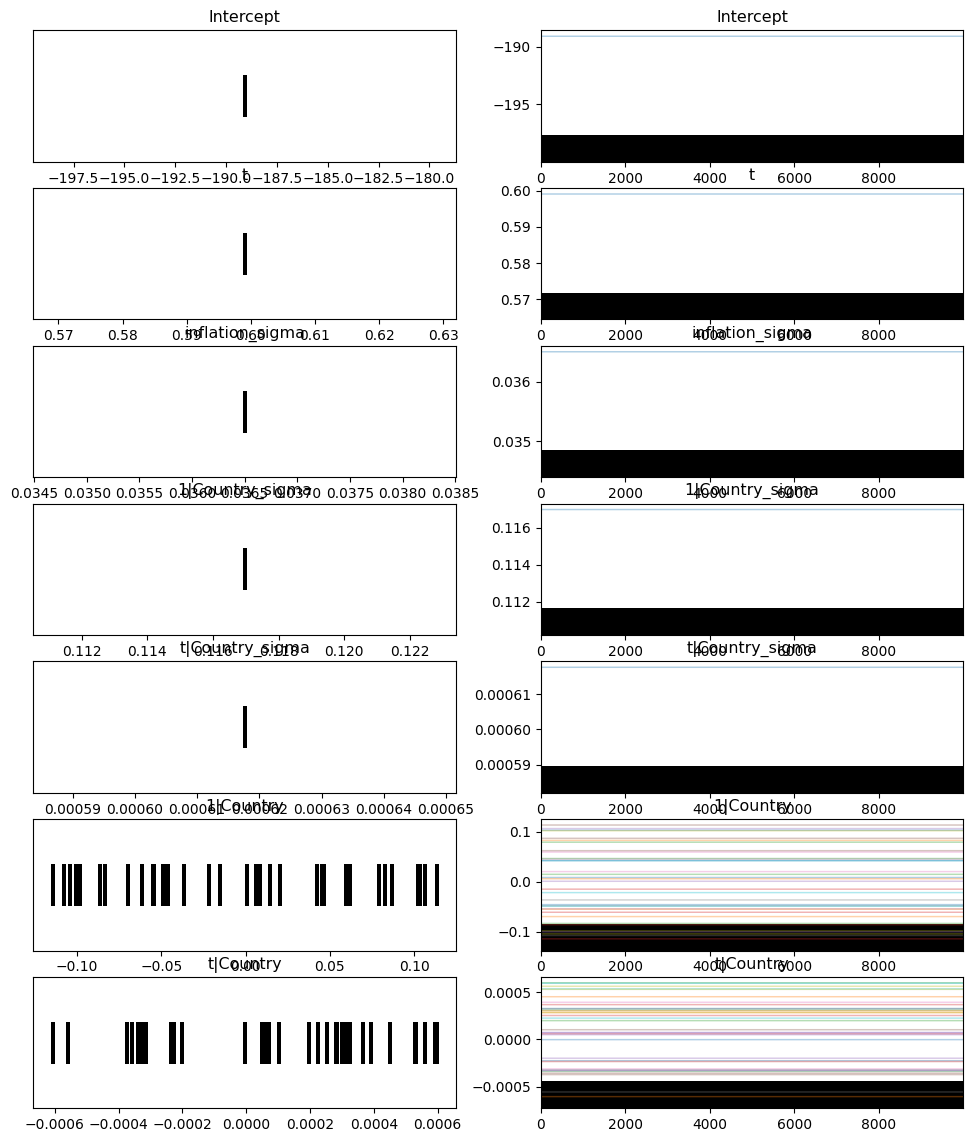

In [4]:
az.plot_trace(res)

In [5]:
az.summary(res).sort_values("mean")

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-189.078,0.0,-189.078,-189.078,0.0,0.0,10000.0,10000.0,NaN
1|Country[Ireland],-0.114,0.0,-0.114,-0.114,0.0,0.0,10000.0,10000.0,NaN
1|Country[Fiji],-0.108,0.0,-0.108,-0.108,0.0,0.0,10000.0,10000.0,NaN
1|Country[Malaysia],-0.104,0.0,-0.104,-0.104,0.0,0.0,10000.0,10000.0,NaN
1|Country[United States],-0.100,0.0,-0.100,-0.100,0.0,0.0,10000.0,10000.0,NaN
...,...,...,...,...,...,...,...,...,...
1|Country[Australia],0.103,0.0,0.103,0.103,0.0,0.0,10000.0,10000.0,NaN
1|Country[Italy],0.106,0.0,0.106,0.106,0.0,0.0,10000.0,10000.0,NaN
1|Country[Japan],0.114,0.0,0.114,0.114,0.0,0.0,10000.0,10000.0,NaN
1|Country_sigma,0.117,0.0,0.117,0.117,0.0,0.0,10000.0,10000.0,NaN
